In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import tensorflow as tf

# Data Preprocessing

In [2]:
#load data
df = pd.read_csv("DataFiles/5.urldata.csv")

In [3]:
df.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [4]:
df.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [5]:
#check for null values
df.isnull().sum()

Domain           0
Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [6]:
#check for categorical variables
df.dtypes

Domain           object
Have_IP           int64
Have_At           int64
URL_Length        int64
URL_Depth         int64
Redirection       int64
https_Domain      int64
TinyURL           int64
Prefix/Suffix     int64
DNS_Record        int64
Web_Traffic       int64
Domain_Age        int64
Domain_End        int64
iFrame            int64
Mouse_Over        int64
Right_Click       int64
Web_Forwards      int64
Label             int64
dtype: object

In [7]:
#drop domain column
df = df.drop(['Domain'], axis=1)

In [8]:
#shuffle dataset
df = df.sample(frac=1).reset_index(drop=True)

In [9]:
#split data into features and label
y = df['Label']
X = df.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [10]:
#split data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((6700, 16), (3300, 16))

# Building the Model

In [16]:
# Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                 metrics=["accuracy"])

model_history = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
210/210 [==============================] - 1s 2ms/step - loss: 0.6813 - accuracy: 0.6193
Epoch 2/500
210/210 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6273
Epoch 3/500
210/210 [==============================] - 0s 1ms/step - loss: 0.6646 - accuracy: 0.6528
Epoch 4/500
210/210 [==============================] - 0s 1ms/step - loss: 

Epoch 72/500
210/210 [==============================] - 0s 835us/step - loss: 0.4035 - accuracy: 0.8079
Epoch 73/500
210/210 [==============================] - 0s 845us/step - loss: 0.4045 - accuracy: 0.8076
Epoch 74/500
210/210 [==============================] - 0s 948us/step - loss: 0.4029 - accuracy: 0.8087
Epoch 75/500
210/210 [==============================] - 0s 906us/step - loss: 0.4035 - accuracy: 0.8052
Epoch 76/500
210/210 [==============================] - 0s 837us/step - loss: 0.4040 - accuracy: 0.8048
Epoch 77/500
210/210 [==============================] - 0s 828us/step - loss: 0.4034 - accuracy: 0.8093
Epoch 78/500
210/210 [==============================] - 0s 829us/step - loss: 0.4046 - accuracy: 0.8058
Epoch 79/500
210/210 [==============================] - 0s 842us/step - loss: 0.4045 - accuracy: 0.8069
Epoch 80/500
210/210 [==============================] - 0s 829us/step - loss: 0.4035 - accuracy: 0.8085
Epoch 81/500
210/210 [==============================] - 0s 2ms/s

210/210 [==============================] - 0s 913us/step - loss: 0.3975 - accuracy: 0.8124
Epoch 152/500
210/210 [==============================] - 0s 848us/step - loss: 0.3981 - accuracy: 0.8096
Epoch 153/500
210/210 [==============================] - 0s 879us/step - loss: 0.3988 - accuracy: 0.8103
Epoch 154/500
210/210 [==============================] - 0s 840us/step - loss: 0.3980 - accuracy: 0.8118
Epoch 155/500
210/210 [==============================] - 0s 869us/step - loss: 0.3986 - accuracy: 0.8119
Epoch 156/500
210/210 [==============================] - 0s 900us/step - loss: 0.3992 - accuracy: 0.8099
Epoch 157/500
210/210 [==============================] - 0s 978us/step - loss: 0.3986 - accuracy: 0.8106
Epoch 158/500
210/210 [==============================] - 0s 841us/step - loss: 0.3977 - accuracy: 0.8125
Epoch 159/500
210/210 [==============================] - 0s 894us/step - loss: 0.3977 - accuracy: 0.8107
Epoch 160/500
210/210 [==============================] - 0s 977us/ste

210/210 [==============================] - 0s 876us/step - loss: 0.3907 - accuracy: 0.8191
Epoch 230/500
210/210 [==============================] - 0s 850us/step - loss: 0.3895 - accuracy: 0.8196
Epoch 231/500
210/210 [==============================] - 0s 827us/step - loss: 0.3900 - accuracy: 0.8185
Epoch 232/500
210/210 [==============================] - 0s 836us/step - loss: 0.3886 - accuracy: 0.8188
Epoch 233/500
210/210 [==============================] - 0s 835us/step - loss: 0.3878 - accuracy: 0.8204
Epoch 234/500
210/210 [==============================] - 0s 846us/step - loss: 0.3897 - accuracy: 0.8185
Epoch 235/500
210/210 [==============================] - 0s 848us/step - loss: 0.3890 - accuracy: 0.8206
Epoch 236/500
210/210 [==============================] - 0s 894us/step - loss: 0.3886 - accuracy: 0.8196
Epoch 237/500
210/210 [==============================] - 0s 841us/step - loss: 0.3884 - accuracy: 0.8209
Epoch 238/500
210/210 [==============================] - 0s 836us/ste

210/210 [==============================] - 0s 843us/step - loss: 0.3842 - accuracy: 0.8242
Epoch 308/500
210/210 [==============================] - 0s 826us/step - loss: 0.3827 - accuracy: 0.8251
Epoch 309/500
210/210 [==============================] - 0s 832us/step - loss: 0.3819 - accuracy: 0.8230
Epoch 310/500
210/210 [==============================] - 0s 832us/step - loss: 0.3813 - accuracy: 0.8245
Epoch 311/500
210/210 [==============================] - 0s 835us/step - loss: 0.3813 - accuracy: 0.8254
Epoch 312/500
210/210 [==============================] - 0s 846us/step - loss: 0.3820 - accuracy: 0.8240
Epoch 313/500
210/210 [==============================] - 0s 821us/step - loss: 0.3820 - accuracy: 0.8243
Epoch 314/500
210/210 [==============================] - 0s 836us/step - loss: 0.3829 - accuracy: 0.8236
Epoch 315/500
210/210 [==============================] - 0s 836us/step - loss: 0.3816 - accuracy: 0.8263
Epoch 316/500
210/210 [==============================] - 0s 840us/ste

210/210 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 0.8273
Epoch 387/500
210/210 [==============================] - 0s 1ms/step - loss: 0.3757 - accuracy: 0.8288
Epoch 388/500
210/210 [==============================] - 0s 894us/step - loss: 0.3750 - accuracy: 0.8290
Epoch 389/500
210/210 [==============================] - 0s 1ms/step - loss: 0.3750 - accuracy: 0.8309
Epoch 390/500
210/210 [==============================] - 0s 952us/step - loss: 0.3750 - accuracy: 0.8309
Epoch 391/500
210/210 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8278
Epoch 392/500
210/210 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8293
Epoch 393/500
210/210 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8284
Epoch 394/500
210/210 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.8301
Epoch 395/500
210/210 [==============================] - 0s 1ms/step - loss: 0.3741

210/210 [==============================] - 0s 947us/step - loss: 0.3696 - accuracy: 0.8334
Epoch 465/500
210/210 [==============================] - 0s 892us/step - loss: 0.3681 - accuracy: 0.8357
Epoch 466/500
210/210 [==============================] - 0s 883us/step - loss: 0.3686 - accuracy: 0.8343
Epoch 467/500
210/210 [==============================] - 0s 877us/step - loss: 0.3685 - accuracy: 0.8336
Epoch 468/500
210/210 [==============================] - 0s 894us/step - loss: 0.3684 - accuracy: 0.8364
Epoch 469/500
210/210 [==============================] - 0s 885us/step - loss: 0.3675 - accuracy: 0.8358
Epoch 470/500
210/210 [==============================] - 0s 894us/step - loss: 0.3677 - accuracy: 0.8367
Epoch 471/500
210/210 [==============================] - 0s 888us/step - loss: 0.3678 - accuracy: 0.8337
Epoch 472/500
210/210 [==============================] - 0s 870us/step - loss: 0.3673 - accuracy: 0.8336
Epoch 473/500
210/210 [==============================] - 0s 877us/ste

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                170       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'loss')

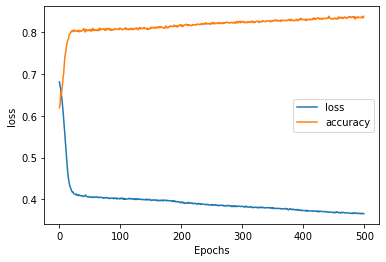

In [18]:
pd.DataFrame(model_history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("loss")

# Evaluation

In [22]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

104/104 [==============================] - 0s 1ms/step - loss: 0.3898 - accuracy: 0.8145
Model loss on the test set: 0.3897991478443146
Model accuracy on the test set: 81.45%


In [24]:
# Create a confusion matrix to evaluate the model
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[1581,   62],
       [ 550, 1107]])